<a href="https://colab.research.google.com/github/jcmachicaocuf/CUF__NLP_LLM/blob/main/nlp__chunking_demo_monitoreo_medios.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#@title Instalaciones
!pip install PyPDF2

In [ ]:
#@title Librerías
import PyPDF2
import pandas as pd
import re
import nltk
nltk.download('punkt')
from nltk import word_tokenize
from nltk.probability import FreqDist

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


In [ ]:
from google.colab import drive
drive.mount('/content/drive')



Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
ruta = 'drive/My Drive/Propuestas/propuestas_geodinamica/data/results/'


In [ ]:
textos = pd.read_excel(ruta + 'parrafos_procesados.xlsx')
textos = textos.iloc[:,1:]

In [ ]:
textos.head()

,documento,titulo,texto,departamento,medio,intensidad,polaridad,acuerdo,subjetividad,confianza,ironía
0,N° 2792_13-06-2020,Suspenden proceso electoral en la UNSA,La jueza del Juzgado Especializado Constituci...,Arequipa,Diario Correo,1,P,AGREEMENT,OBJECTIVE,100,NONIRONIC
1,N° 2792_13-06-2020,Agricultores del valle de Tambo realiza cace...,El día ayer los agricultores del valle de Tam...,Arequipa,La República,3,N,AGREEMENT,OBJECTIVE,100,NONIRONIC
2,N° 2792_13-06-2020,Población quema antena de telefonía y retie...,"En el centro poblado de Huanacopampa, en el d...",Huancavelica,Diario Correo,4,N,AGREEMENT,OBJECTIVE,100,NONIRONIC
3,N° 2792_13-06-2020,Contraloría supervisó penal El Milagro,"El día de ayer, la Contraloría General de la ...",La Libertad,Diario Correo,1,N,AGREEMENT,OBJECTIVE,100,NONIRONIC
4,N° 2792_13-06-2020,Personal de salud del Hospital Víctor Lazart...,"El día de ayer, un grupo de personal de salud...",La Libertad,TV Cosmos,3,N,AGREEMENT,SUBJECTIVE,92,NONIRONIC


# Spacy para eventos de conflictos

In [ ]:
!python -m spacy download es

✔ Download and installation successful
You can now load the model via spacy.load('es_core_news_sm')
✔ Linking successful
/usr/local/lib/python3.6/dist-packages/es_core_news_sm -->
/usr/local/lib/python3.6/dist-packages/spacy/data/es
You can now load the model via spacy.load('es')


In [ ]:
import spacy
from string import punctuation
nlp = spacy.load("es")


In [ ]:
from spacy.lemmatizer import Lemmatizer, ADJ, NOUN, VERB

lemmatizer = nlp.vocab.morphology.lemmatizer

In [ ]:
def get_hotverbs(text):
    result = []
    pos_tag = ['VERB']
    #pos_tag = ['PROPN', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

    return result # 5

In [ ]:
def get_hotnouns(text):
    result = []
    pos_tag = ['PROPN', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.text)

    return result # 5

In [ ]:
import itertools
from collections import Counter
textos['verbos_evento']=textos.apply(lambda row:get_hotverbs(row['texto']),axis=1)
textos['nouns_evento']=textos.apply(lambda row:get_hotnouns(row['texto']),axis=1)

In [ ]:
textos['verbos_titular']=textos.apply(lambda row:get_hotverbs(row['titulo']),axis=1)
textos['nouns_titular']=textos.apply(lambda row:get_hotnouns(row['titulo']),axis=1)
textos['verbos_titular_lemma']=textos.apply(lambda row:get_hotverbs_lemma(row['titulo']),axis=1)
textos['nouns_titular_lemma']=textos.apply(lambda row:get_hotnouns_lemma(row['titulo']),axis=1)

In [ ]:
textos.to_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/parrafos_procesados_verbosynouns.xlsx')

In [ ]:
d = Counter(textos.hotwords.sum()).most_common(40)
df = pd.DataFrame([d])

Otros_words=df.T
Otros_words.head()

,0
0,"(exigiendo, 22)"
1,"(realizan, 11)"
2,"(realizaron, 10)"
3,"(adjuntía, 10)"
4,"(exigen, 8)"


# Spacy para titulares web

In [ ]:
noticias = pd.read_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/noticias_titulares.xlsx')
noticias = noticias.iloc[:,1:]

In [ ]:
def get_hotverbs_lemma(text):
    result = []
    pos_tag = ['VERB']
    #pos_tag = ['PROPN', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.lemma_)

    return result # 5

In [ ]:
def get_hotnouns_lemma(text):
    result = []
    pos_tag = ['PROPN', 'NOUN'] # 1
    doc = nlp(text.lower()) # 2
    for token in doc:
        # 3
        if(token.text in nlp.Defaults.stop_words or token.text in punctuation):
            continue
        # 4
        if(token.pos_ in pos_tag):
            result.append(token.lemma_)

    return result # 5

In [ ]:
noticias['verbos_titular']=noticias.apply(lambda row:get_hotverbs(row['titular']),axis=1)
noticias['nouns_titular']=noticias.apply(lambda row:get_hotnouns(row['titular']),axis=1)
noticias['verbos_titular_lemma']=noticias.apply(lambda row:get_hotverbs_lemma(row['titular']),axis=1)
noticias['nouns_titular_lemma']=noticias.apply(lambda row:get_hotnouns_lemma(row['titular']),axis=1)
noticias.head()

,fuente,titular,verbos_titular,nouns_titular,verbos_titular_lemma,nouns_titular_lemma
0,https://gestion.pe/,Cambios en feriados por Fiestas Patrias: ¿cómo...,[calculará],"[cambio, feriar, fiesta, pagar, trabajador]",[calcular],"[cambio, feriar, fiesta, pagar, trabajador]"
1,https://gestion.pe/,Inmunidad parlamentaria: Ledesma ve difícil un...,[ve],"[inmunidad, ledesma, referéndum, riesgo, covid...",[ver],"[inmunidad, ledesma, referéndum, riesgo, covid..."
2,https://gestion.pe/,Fiscal Domingo Pérez: esta semana es decisiva ...,[],"[fiscal, domingo, pérez, semana, pedro, chávar...",[],"[fiscal, domingo, pérez, semana, pedro, chávar..."
3,https://gestion.pe/,Osinergmin prohíbe condicionar pagos de luz y ...,"[prohíbe, condicionar, atender, reclamos]","[osinergmin, pago, luz, gas, facturación]","[prohibir, condicionar, atender, reclamo]","[osinergmin, pago, luz, gas, facturación]"
4,https://gestion.pe/,ATU: Estamos próximos a dar la viabilidad de l...,[],"[viabilidad, líneo, metro, limar]",[],"[viabilidad, líneo, metro, limar]"


In [ ]:
noticias.to_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/noticias_titulares.xlsx')

# Verbos con Chunker

In [ ]:
import pandas as pd
#df = pd.read_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/parrafos_procesados_verbos.xlsx')
#df = df[['texto']]


In [ ]:
#df.to_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/parrafos_procesados_ingles.xlsx')


In [ ]:
df = pd.read_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/parrafos_procesados_ingles.xlsx')
df = df[['text']]
df.head()

,text
0,Judge of the Court for Constitutional Karina ...
1,Yesterday on farmers Tambo Valley in the prov...
2,In the center of Huanacopampa populated in th...
3,"Yesterday, the General Comptroller of the Rep..."
4,"Yesterday, a group of health personnel of the..."


In [ ]:
import nltk
from nltk.tokenize import word_tokenize
from nltk.tag import pos_tag
from nltk import ne_chunk_sents
from nltk import bigrams
nltk.download('averaged_perceptron_tagger')
from nltk.tag import pos_tag
nltk.download('punkt')


[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [ ]:
import itertools
from collections import Counter
#df['hot_bigrams']=df.apply(lambda row:FreqDist(row['bigrams_1']),axis=1)


In [ ]:
%reload_ext autoreload
%autoreload 2
import sys, os
sys.path.append('drive/My Drive/Propuestas/propuestas_geodinamica/src/')

import chunker


In [ ]:
import numpy as np
import pandas as pd
import nltk
from nltk.tokenize import word_tokenize, sent_tokenize
from nltk.tag import pos_tag
from nltk import ne_chunk_sents
import re
from nltk.corpus import stopwords

import sys

def PosTagger(text):

    sent_tokenized = sent_tokenize(text)
    tokenized =  [word_tokenize(sent) for sent in sent_tokenized]
    pos_tagged = [pos_tag(sent) for sent in tokenized]

    return pos_tagged

def FirstGrammar(df, isFile = True, columns = False):

    grammar = "NP: {<DT>?<JJ>*<NN>}"
    cp = nltk.RegexpParser(grammar)
    df['first_grammar'] = df.apply(lambda row: [cp.parse(sent) for sent in row['pos_tagged']] , axis=1)

    return df




In [ ]:
df['pos_tagger'] = df.apply(lambda x: PosTagger(x['text']), axis = 1)

In [ ]:
df['tokenized'] = df.apply(lambda row:word_tokenize(row['text']), axis = 1)
df['pos_tagged'] = df.apply(lambda row:pos_tag(row['tokenized']), axis = 1)

In [ ]:
grammar = "NP: {<DT>?<JJ>*<NN>}"

cp = nltk.RegexpParser(grammar)
#result = cp.parse(df_text)
df['first_grammar'] = df.apply(lambda row:cp.parse(row['pos_tagged']), axis=1)


In [ ]:
nltk.download('conll2000')

[nltk_data] Downloading package conll2000 to /root/nltk_data...
[nltk_data]   Package conll2000 is already up-to-date!


True

In [ ]:
from nltk.corpus import conll2000
import sys
train_sents = conll2000.chunked_sents('train.txt', chunk_types=['NP'])


In [ ]:
import re
from nltk.corpus import stopwords
nltk.download('stopwords')
stopwords_set = set(stopwords.words("english"))
stopwords_set.add("It")
stopwords_set.add("The")
stopwords_set.add("http")
stopwords_set.add('//wwwdefensoriagobpe/temasphp')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
class BigramChunker(nltk.ChunkParserI):
    def __init__(self, train_sents):
        train_data = [[(t,c) for w,t,c in nltk.chunk.tree2conlltags(sent)]
                      for sent in train_sents]
        self.tagger = nltk.BigramTagger(train_data)

    def parse(self, sentence):
        pos_tags = [pos for (word,pos) in sentence]
        tagged_pos_tags = self.tagger.tag(pos_tags)
        chunktags = [chunktag for (pos, chunktag) in tagged_pos_tags]
        conlltags = [(word, pos, chunktag) for ((word,pos),chunktag)
                     in zip(sentence, chunktags) if chunktag!='O' and chunktag != None]
        iobTags=[]
        for(word, pos, chunktag) in conlltags:
            #sys.stdout.write ("%s ->" % iobTags)
            if chunktag == 'B-NP':
                iobTags.append ([])
            iobTags[-1].append (word)
            #sys.stdout.write ("%s, (%s, %s, %s)\n" %(iobTags, word, pos, chunktag))

        iobTags = [' '.join(_) for _ in iobTags if not (' '.join(_) in stopwords_set)]
        return iobTags
        #return conlltags
bigram_chunker = BigramChunker(train_sents)

In [ ]:
df['bigram_chunker']=df.apply(lambda row: bigram_chunker.parse(row['pos_tagged']), axis = 1)
df['bigram_chunker']

0     [Judge, the Court, Constitutional Karina El Ca...
1     [Yesterday, farmers Tambo Valley, the province...
2     [the center, Huanacopampa, the district, Pauca...
3     [Yesterday, the General Comptroller, the Repub...
4     [Yesterday, a group, health personnel, the Hos...
                            ...                        
83    [farmers, its list, agreements, those seeking,...
84    [Yesterday traders, a protest, front, the Prov...
85    [Yesterday population, the town center Tambo d...
86    [Today UGELs administrative workers, a sit, pa...
87    [Yesterday a group, citizens, the streets, the...
Name: bigram_chunker, Length: 88, dtype: object

In [ ]:
df_chunked=df[['text','bigram_chunker']]

In [ ]:
df_chunked.to_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/parrafos_procesados_chunked.xlsx')

# Gráficos

In [ ]:
noun_phrases=df['bigram_chunker'].apply(pd.Series).stack().apply(pd.Series)\
                    .rename({0:'phrase'}, axis = 1).reset_index().drop('level_1',axis=1)


In [ ]:
noun_phrases['phrase']=noun_phrases.apply(lambda row: str.lower(row['phrase']),axis=1)\
                                    .str.replace('\d+','').str.replace("[-+.^:,]","").fillna('')

In [ ]:
noun_phrases=noun_phrases[(noun_phrases.phrase != '')&(noun_phrases.phrase != ' ')].dropna()

In [ ]:
from nltk.corpus import stopwords
nltk.download('stopwords')
from nltk.corpus import stopwords
stopwords_set = set(stopwords.words("english"))
new_stopwords = ['It','The','the','this','e.g','%','we']
stopwords_set = stopwords_set.union(new_stopwords)

In [ ]:
noun_phrases['phrase'] = noun_phrases['phrase'].apply(lambda x: ' '.join([word for word in x.split() if word not in (stopwords_set)]))
noun_phrases.dropna(inplace=True)

In [ ]:
noun_phrases_grouped=noun_phrases.groupby('phrase').count().sort_values('level_0',ascending=False).rename({'level_0':'count'}, axis = 1)
noun_phrases_grouped.to_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/noun_phrases_grouped.xlsx')

In [ ]:
noun_phrases_grouped.reset_index(inplace=True)
noun_phrases_grouped['totalwords'] = noun_phrases_grouped['phrase'].str.count(' ') + 1
noun_phrases_grouped=noun_phrases_grouped[(noun_phrases_grouped.phrase != '')&(noun_phrases_grouped.phrase != ' ')].dropna()
noun_phrases_grouped.sort_values(by='count',ascending=False)

,phrase,count,totalwords
0,['yesterday group' 'students' 'the universidad...,2,31
2,['yesterday group' 'citizens' 'the streets' 't...,2,18
3,['monday' 'a sector' 'the population' 'a cacer...,2,31
4,['today ugels administrative workers' 'a sit' ...,2,14
5,['farmers' 'its list' 'agreements' 'those seek...,2,29
...,...,...,...
30,['yesterday' 'dozens' 'civil construction work...,1,35
29,['yesterday' 'farmers tambo valley' 'the provi...,1,20
28,['yesterday' 'health personnel' 'the hospital ...,1,21
27,['yesterday' 'health personnel' 'the hospital'...,1,41


In [ ]:
import pandas as pd
noun_phrases_grouped.to_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/noun_phrases_grouped.xlsx')


In [ ]:
df = pd.read_excel('drive/My Drive/Propuestas/propuestas_geodinamica/data/results/final.xlsx')
noun_phrases_grouped = df[['frase','count','totalwords']]

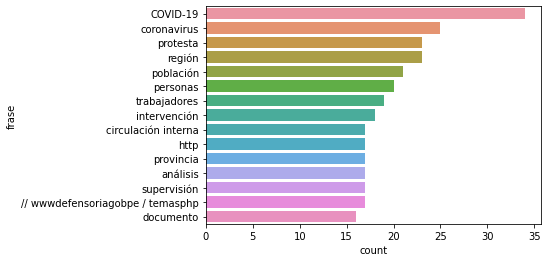

In [ ]:
import seaborn as sns
sns.barplot(y="frase",x="count", data=noun_phrases_grouped.head(15))

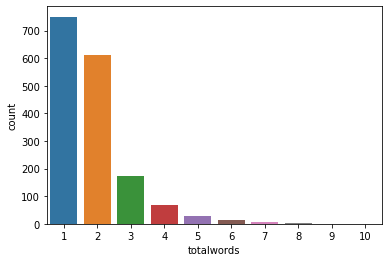

In [ ]:
sns.barplot(y='count',x="totalwords", data=noun_phrases_grouped.groupby('totalwords').count().reset_index())

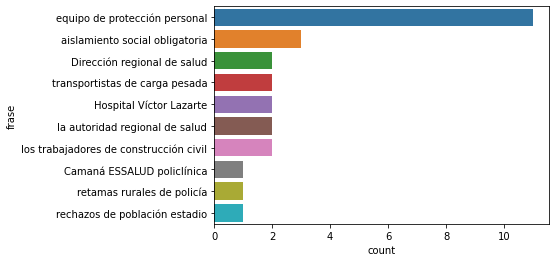

In [ ]:
sns.barplot(x='count',y="frase", data=noun_phrases_grouped[noun_phrases_grouped['totalwords']==3].head(10))

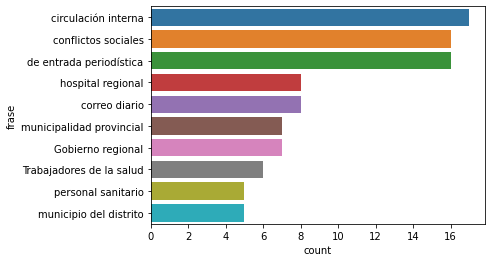

In [ ]:
sns.barplot(x='count',y="frase", data=noun_phrases_grouped[noun_phrases_grouped['totalwords']==2].head(10))